Завдання 1 (Відокремити корені рівняння)

In [45]:
import math
import numpy as np
from scipy.misc import derivative

def f(x):
   return 2 * (x**4) - 8 * (x**3) - 16 * (x**2) - 1

eps=0.001

print("Дійсні корені рівняння (Відокремлення коренів):")
def find_segments():
    search_range = np.arange(-10, 10, 1)

    a = None
    previous_x = None
    current_x  = None
    segments = []

    for x in search_range:
        x = round(x, 4)
        current_x = f(x)
        if previous_x != None and previous_x * current_x < 0:
            segments.append((a, x))
        a = x
        previous_x = current_x

    return segments
segments = find_segments()

for a, b in segments:
    print(f'Знайдено сегмент: [{a}, {b}]')

print(" ")
print("Метод половинного ділення: ")


def rec(a, b, eps):

  while (abs(a-b) > eps):
    if f(a)*f((a+b)/2)<0:
      b = (a+b)/2
    else:
      a = (a+b)/2
  x = (a+b)/2
  print ('x =', round(x,5))

  print(" ")
  print("Метод хорд: ")

def hord (a,b,eps):

  if (f(a)*derivative(f,a,n=2)>0):
    x0=a
    xi=b
  else:
      x0=b
      xi=a
  xi_1=xi-(xi-x0)*f(xi)/(f(xi)-f(x0))
  while (abs(xi_1-xi)>eps):
      xi=xi_1
  xi_1=xi-(xi-x0)*f(xi)/(f(xi)-f(x0))
  print('x= ', round (xi_1,5))
  print(" ")

a = -2
b = -1
rec (a,b,eps)
hord (a,b,eps)
print (f"Розв’язок нелінійного рівняння на відрізку [{a}, {b}]")
print(" ")

a = 5
b = 6
print("Метод половинного ділення: ")
rec (a,b,eps)
hord (a,b,eps)
print (f"Розв’язок нелінійного рівняння на відрізку [{a}, {b}]")
print(" ")

Дійсні корені рівняння (Відокремлення коренів):
Знайдено сегмент: [-2, -1]
Знайдено сегмент: [5, 6]
 
Метод половинного ділення: 
x = -1.49658
 
Метод хорд: 
x=  -1.32052
 
Розв’язок нелінійного рівняння на відрізку [-2, -1]
 
Метод половинного ділення: 
x = 5.46631
 
Метод хорд: 
x=  5.43768
 
Розв’язок нелінійного рівняння на відрізку [5, 6]
 


<ipython-input-45-04b88e806ccd>:52: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  if (f(a)*derivative(f,a,n=2)>0):


Завдання 2 (Багатачлен Лагранджа)

Значення y за x_5 = -25.0
Значення y за x_6 = 3.0
Значення y за x_7 = 0.375
Значення y за x_8 = 3.875


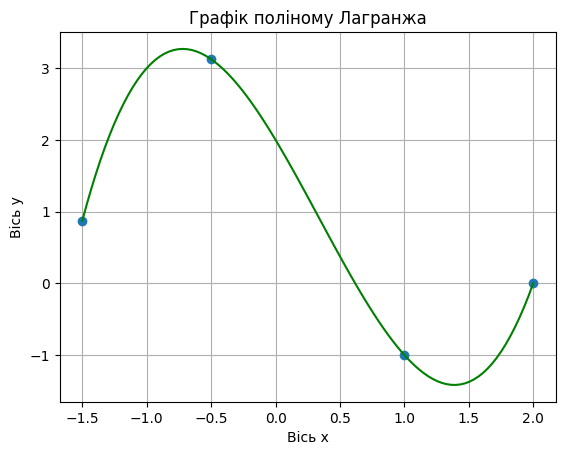

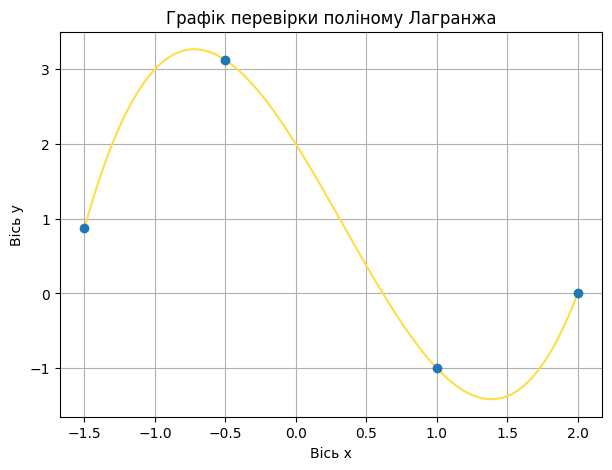

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x=np.array([-1.5, -0.5, 1., 2.])
y=np.array([0.875, 3.125, -1., 0.])

def lagrange_interpolation(x, y, x_pidst):
    n = len(x)
    m = np.zeros(n)
    for i in range(n):
        m_i = 1
        for j in range(n):
            if i != j:
                m_i *= (x_pidst - x[j])/(x[i] - x[j])
        m[i] = m_i
    return np.dot(y, m)

f_interp = lagrange_interpolation(x, y, -3)
print("Значення y за x_5 =", f_interp.round(4))
f_interp = lagrange_interpolation(x, y, -1)
print("Значення y за x_6 =", f_interp.round(4))
f_interp = lagrange_interpolation(x, y, 0.5)
print("Значення y за x_7 =", f_interp.round(4))
f_interp = lagrange_interpolation(x, y, 2.5)
print("Значення y за x_8 =", f_interp.round(4))

# Графік

xnew=np.linspace(np.min(x),np.max(x),100)
ynew=[lagrange_interpolation(x,y,i) for i in xnew]

plt.plot(x,y, 'o', xnew, ynew, 'g')
plt.title('Графік поліному Лагранжа')
plt.grid(True)
plt.xlabel('Вісь x')
plt.ylabel('Вісь y')
plt.show()

#Перевірка

f = lagrange(x, y)
fig = plt.figure(figsize = (7,5))
plt.plot(xnew, f(xnew), '#FFDD44', x, y, 'o')
plt.title('Графік перевірки поліному Лагранжа')
plt.grid()
plt.xlabel('Вісь x')
plt.ylabel('Вісь y')
plt.show()

Задача 3 (Кубічний сплайн)

Відрізок 1:
S_0(x) = 2.65 + 1.0177(x - 0.1) + 0.0(x - 0.1)^2 + -12.9435(x - 0.1)^3, x належить [0.1, 0.3]
Відрізок 2:
S_1(x) = 2.75 + -0.5355(x - 0.3) + -7.7661(x - 0.3)^2 + 11.096(x - 0.3)^3, x належить [0.3, 0.6]
Відрізок 3:
S_2(x) = 2.19 + -2.1992(x - 0.6) + 2.2203(x - 0.6)^2 + 0.9162(x - 0.6)^3, x належить [0.6, 1.1]
Відрізок 4:
S_3(x) = 1.76 + 0.7082(x - 1.1) + 3.5946(x - 1.1)^2 + -1.7117(x - 1.1)^3, x належить [1.1, 1.8]

Значення сплайна:
x = 0.10, y = 2.650
x = 0.12, y = 2.686
x = 0.13, y = 2.717
x = 0.15, y = 2.741
x = 0.17, y = 2.760
x = 0.19, y = 2.774
x = 0.20, y = 2.783
x = 0.22, y = 2.787
x = 0.24, y = 2.786
x = 0.25, y = 2.781
x = 0.27, y = 2.772
x = 0.29, y = 2.760
x = 0.31, y = 2.744
x = 0.32, y = 2.725
x = 0.34, y = 2.703
x = 0.36, y = 2.678
x = 0.37, y = 2.651
x = 0.39, y = 2.621
x = 0.41, y = 2.590
x = 0.43, y = 2.557
x = 0.44, y = 2.523
x = 0.46, y = 2.487
x = 0.48, y = 2.451
x = 0.49, y = 2.414
x = 0.51, y = 2.377
x = 0.53, y = 2.339
x = 0.55, y = 2.302
x = 0.56, 

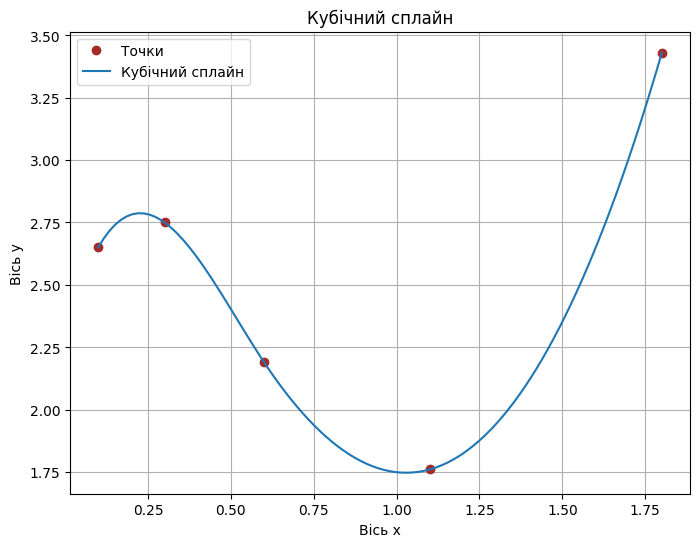

In [48]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.array([0.1, 0.3, 0.6, 1.1, 1.8, 0])
y = np.array([2.65, 2.75, 2.19, 1.76, 3.43, 0])

n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)

alpha = np.zeros(n)
for i in range(1, n):
  alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)

for i in range(1, n):
  l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
  mu[i] = h[i] / l[i]
  z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

for j in range(n - 2, -1, -1):
  c[j] = z[j] - mu[j] * c[j+1]
  b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
  d[j] = (c[j+1] - c[j]) / (3 * h[j])

for i in range(n - 1):
  print(f"Відрізок {i+1}:")
  print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

x = np.array([0.1, 0.3, 0.6, 1.1, 1.8])
y = np.array([2.65, 2.75, 2.19, 1.76, 3.43])
cs = CubicSpline(x, y)

x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

print("")
print("Значення сплайна:")
for i in range(len(x_new)):
  print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")

#Графік
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки', color = 'brown')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('Вісь x')
plt.ylabel('Вісь y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()

Задача 4(Функції найменших квадратів)

Наші данні.
i =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x =  [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y =  [1.18006658 1.32106099 1.42533561 1.49670671 1.54030231 1.56235775
 1.56996714 1.57080048 1.57279791 1.58385316]

Аналітичні розрахунки
x_ =  0.55
x_2 =  0.385
y_ =  1.4823248645804508
y_x =  0.8471056690834763
a1 =  0.3857817401724651
a0 =  1.2701449074855948
a0 = 0.39, a1 = 1.27


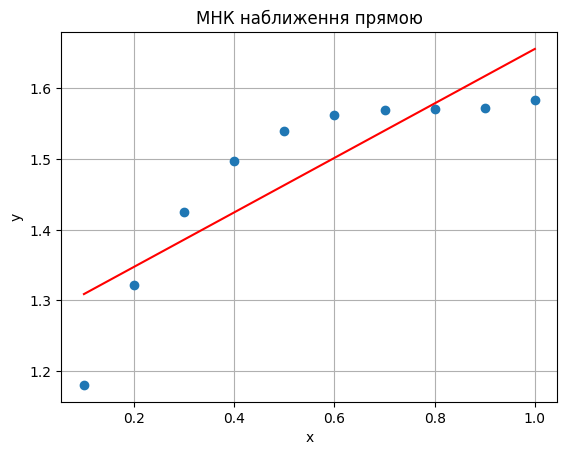

a0 = 1.08, a1 = 1.32, a2 = -0.85


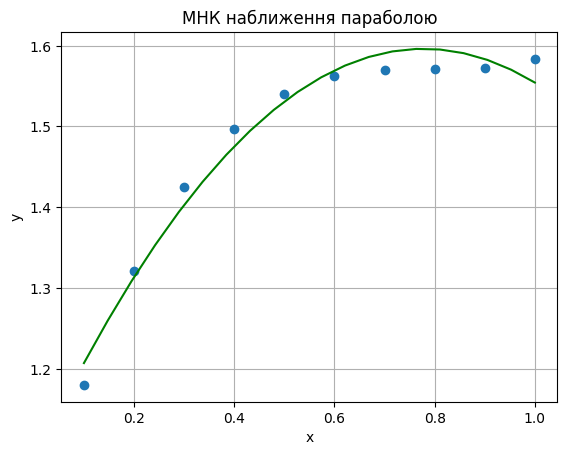

In [68]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

def function_e(x):
  return np.cos(2*x) + 2 * x

x = np.arange(0.1, 1.1, 0.1)
y = np.ones(len(x))

count = 0
count_list = []
for i in x:
  y[count] = function_e(i)
  count_list.append(count)
  count += 1

print("Наші данні.")
print("i = ", count_list)
print("x = ", x)
print("y = ", y)

def a_1(yx, x, x2, y):
  return (yx - x * y)/(x2 - x**2)

def a_0(y, a1, x):
  return y - a1 * x

sum_x = np.sum(x)
sum_x2 = np.sum(x**2)
sum_y = np.sum(y)
sum_y_x = np.sum(y * x)

x_ = sum_x / len(x)
x_2 = sum_x2 / len(x)
y_ = sum_y / len(y)
y_x = sum_y_x / len(x)

print()
print("Аналітичні розрахунки:")
print("x_ = ", x_)
print("x_2 = ", x_2)
print("y_ = ", y_)
print("y_x = ", y_x)

a1 = a_1(y_x, x_, x_2, y_)
print("a1 = ", a1)
print("a0 = ", a_0(y_, a1, x_))

def function_prim(a, x, y):
 return np.polyval(a, x) - y

a0 = np.array([1, 1])
res_lsq = least_squares(function_prim, x0=a0, args=(x, y))
print(f"a0 = {res_lsq.x[0].round(2)}, a1 = {res_lsq.x[1].round(2)}")

x_p = np.linspace(min(x), max(x), 20)
y_p = np.polyval(res_lsq.x, x_p)
plt.plot(x, y, 'o')
plt.plot(x_p, y_p, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title("МНК наближення прямою")
plt.grid(True)
plt.show()


def function_parab(a, x, y):
 return a[0] + a[1] * x + a[2] * x**2 - y

a0 = np.array([1, 1, 1])
res_lsq = least_squares(function_parab,x0 = a0, args = (x, y))
print(f"a0 = {res_lsq.x[0].round(2)}, a1 = {res_lsq.x[1].round(2)}, a2 = {res_lsq.x[2].round(2)}")

f = lambda x: sum([u * v for u, v in zip(res_lsq.x, [1, x, x**2])])
x_p = np.linspace(min(x), max(x), 20)
y_p = f(x_p)
plt.plot(x,y, 'o')
plt.plot(x_p, y_p, 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title("МНК наближення параболою")
plt.grid(True)
plt.show()

Задача 5 (Інтеграли)

5.1: Обчислення інтегралу методом трапецій

In [49]:
from scipy import integrate
import numpy as np

def f(x):
    return 1 / ((2 * x + 3)**(1/2))

a = 0.8
b = 1.4
n = 10

def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    x = a
    sum = 0
    for i in range(1, n):
        x += h
        sum += 2 * f(x)
    sum += f(b)
    integral = h / 2 * sum

    return integral

integral1 = trapezoidal_rule(f, a, b, n)
n *= 2
integral2 = trapezoidal_rule(f, a, b, n)

while abs(integral2 - integral1) / 3 > 0.001:
    integral1 = integral2
    n *= 2
    integral2 = trapezoidal_rule(f, a, b, n)

print("Метод трапеції:", round(integral2, 3))

v,err = integrate.quad(f, a, b)

print("Перевірка методу трапеції:",round(v, 5))

Метод трапеції: 0.262
Перевірка методу трапеції: 0.26356


5.2: Обчислення інтеграла методом прямокутників

In [63]:
eps = 0.0001
a = 1.3
b = 2.1


def f1(x):
    return 1 / ((3 * (x ** 2) - 0.4) ** 1/2)

def left_rec(f1,a,b,n):
    h=(b-a)/n
    sum=0
    for i in range(0,n):
        sum+=f1(a+i*h)
    return sum*h

v,err = integrate.quad(f1,a,b)

if abs(left_rec(f1,a,b,2*10) - left_rec(f1,a,b,10))/3. >= eps:
    print("Лівий прямокутник:",round (left_rec(f1,a,b,10), 5))

def right_rec(f1,a,b,n):
    h=(b-a)/n
    sum=0
    for i in range(1,n+1):
        sum+=f1(a+i*h)
    return sum*h

print("Правий прямокутник:",round (right_rec(f1,a,b,10), 5))

def aver_rec(f1,a,b,n):
    h=0.08
    sum=0
    for i in range(0,n):
        sum+=f1(a+i*h)
    return sum*h

print("Середній прямокутник:",round (aver_rec(f1,a,b,10), 5))
print("Перевірка методу прямокутників =",round (v, 5))

Лівий прямокутник: 0.21746
Правий прямокутник: 0.19567
Середній прямокутник: 0.21746
Перевірка методу прямокутників = 0.20626


5.3: Обчислення інтеграла методом Сімпсона

In [65]:
def f(x):
    return (x ** (1/2)) * np.cos(x**2)

a = 0.4
b = 1.2
n = 10

def simpson_rule(f, a, b, n):
    h = (b - a) / n
    integr = f(a) + f(b)
    for i in range(1,n):
        k = a + i*h
        if i%2 == 0:
            integr += 2 * f(k)
        else:
            integr += 4 * f(k)
    integr *= h/3
    return integr

integral1 = simpson_rule(f, a, b, n)
n *= 2
integral2 = simpson_rule(f, a, b, n)

while abs(integral2 - integral1) / 15 > 0.001:
    integral1 = integral2
    n *= 2
    integral2 = simpson_rule(f, a, b, n)

print("Метод Сімпсона:", round(integral2, 3))

v,err = integrate.quad(f1,a,b)

print("Перевірка методу Сімпсона:",round(v, 3))

Метод Сімпсона: 0.484
Перевірка методу Сімпсона: 2.246
